In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip /content/drive/MyDrive/ab_test.zip

Archive:  /content/drive/MyDrive/ab_test.zip
  inflating: ecommerce_ab_testing_2022_dataset1/ab_data.csv  
  inflating: ecommerce_ab_testing_2022_dataset1/countries.csv  


In [26]:
import pandas as pd
df = pd.read_csv('/content/ecommerce_ab_testing_2022_dataset1/ab_data.csv')
df_countries = pd.read_csv('/content/ecommerce_ab_testing_2022_dataset1/countries.csv')

In [ ]:
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,11:48.6,control,old_page,0
1,804228,01:45.2,control,old_page,0
2,661590,55:06.2,treatment,new_page,0
3,853541,28:03.1,treatment,new_page,0
4,864975,52:26.2,control,old_page,1


In [ ]:
df_countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294480 entries, 0 to 294479
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294480 non-null  int64 
 1   timestamp     294480 non-null  object
 2   group         294480 non-null  object
 3   landing_page  294480 non-null  object
 4   converted     294480 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [ ]:
df = pd.merge(df, df_countries, on='user_id', how='inner')

In [ ]:
df.head()

,user_id,timestamp,group,landing_page,converted,country
0,851104,11:48.6,control,old_page,0,US
1,804228,01:45.2,control,old_page,0,US
2,661590,55:06.2,treatment,new_page,0,US
3,853541,28:03.1,treatment,new_page,0,US
4,864975,52:26.2,control,old_page,1,US


In [ ]:
df.country.unique()

array(['US', 'CA', 'UK'], dtype=object)

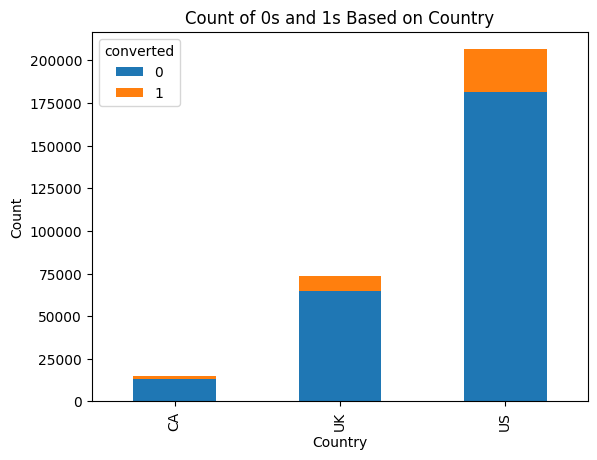

In [ ]:
import matplotlib.pyplot as plt

# Group by 'country' and 'converted' and calculate the count
grouped_df = df.groupby(['country', 'converted']).size().unstack()

# Create a grouped bar plot
grouped_df.plot(kind='bar', stacked=True)

# Add labels and title
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Count of 0s and 1s Based on Country')

# Show the plot
plt.show()

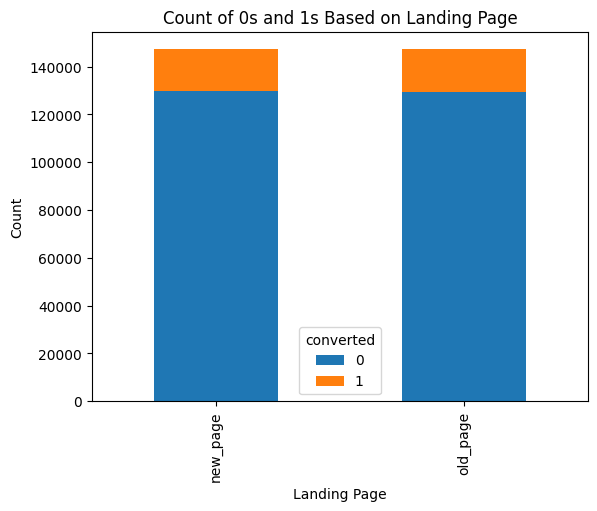

In [ ]:
# Group by 'landing_page' and 'converted' and calculate the count
grouped_df1 = df.groupby(['landing_page', 'converted']).size().unstack()

# Create a grouped bar plot
grouped_df1.plot(kind='bar', stacked=True)

# Add labels and title
plt.xlabel('Landing Page')
plt.ylabel('Count')
plt.title('Count of 0s and 1s Based on Landing Page')

# Show the plot
plt.show()

In [ ]:
# Null Hypothesis (H0): The new page does not have a significant impact on conversion rate.
# Alternative Hypothesis (H1): The new page has a significant impact on conversion rate.

In [27]:
print(df.shape)
df = df.drop_duplicates(subset= 'user_id', keep= False)
print(df.shape)

(294480, 5)
(286690, 5)


In [28]:
df.groupby(['group','landing_page']).agg({'landing_page': lambda x: x.value_counts()})

,,landing_page
group,landing_page,
control,old_page,143293
treatment,new_page,143397


In [29]:
df.groupby(['group','landing_page']).agg({'converted': 'mean'})

,,converted
group,landing_page,
control,old_page,0.120173
treatment,new_page,0.118726


In [30]:
pd.DataFrame(df.loc[:,'landing_page'].value_counts(normalize = True) * 100)

,landing_page
new_page,50.018138
old_page,49.981862


In [ ]:
# Control group = new page
# Treatment group = old page

In [ ]:
#Normality

In [ ]:
#p-value = 0.05

In [12]:
import statsmodels.stats.api as sms
from scipy.stats import shapiro, levene, mannwhitneyu

test_stat, pvalue = shapiro(df.loc[df["landing_page"] == "old_page", "converted"])
print("p-value:",pvalue)
print("test_stat:",test_stat)

p-value: 0.0
test_stat: 0.3792334198951721


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [13]:
test_stat, pvalue = shapiro(df.loc[df["landing_page"] == "new_page", "converted"])
print("p-value:",pvalue)
print("test_stat:",test_stat)

p-value: 0.0
test_stat: 0.37685757875442505


In [14]:
#p-value < 0.05 Conclude that there is strong evidence to suggest that the data does not come from
#a normally distributed population

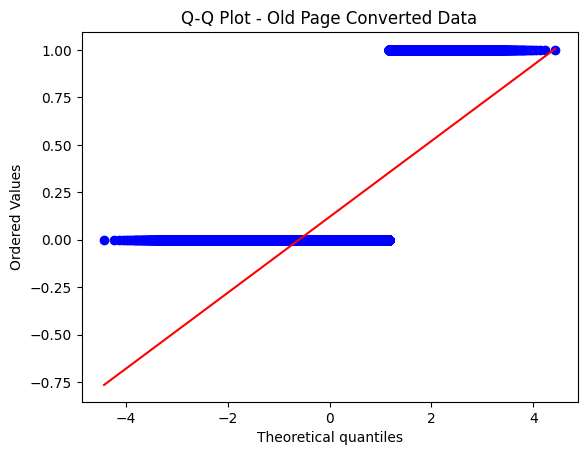

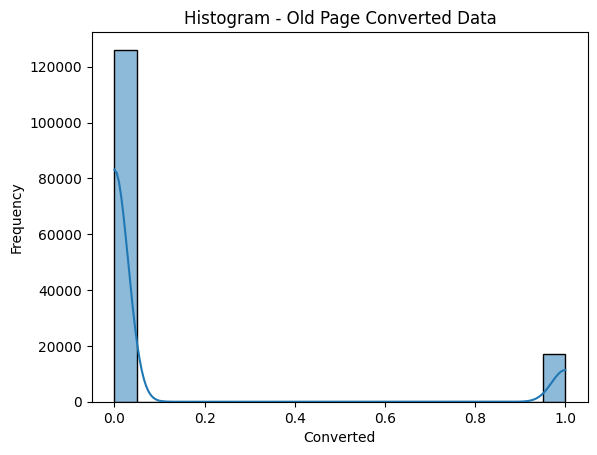

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns

# Assuming df is your DataFrame and 'converted' is the column you want to test
data = df.loc[df["landing_page"] == "old_page", "converted"]

# Plotting Probability Plot (Q-Q Plot)
stats.probplot(data, dist='norm', plot=plt)
plt.title('Q-Q Plot - Old Page Converted Data')
plt.show()

# Plotting Histogram
sns.histplot(data, bins=20, kde=True)
plt.title('Histogram - Old Page Converted Data')
plt.xlabel('Converted')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#it is the same graph for new-page as well

In [ ]:
#Variance Homogeneity

In [16]:
test_stat, pvalue = levene(df.loc[df["landing_page"] == "new_page", "converted"],
                           df.loc[df["landing_page"] == "old_page", "converted"])
print("p-value:",pvalue)
print("test_stat:",test_stat)

p-value: 0.2322897281547632
test_stat: 1.4267917566652295


In [17]:
#p-value > 0.05 so variances are homogeneous

In [ ]:
test_stat, pvalue = mannwhitneyu(df.loc[df["landing_page"] == "new_page", "converted"],
                                 df.loc[df["landing_page"] == "old_page", "converted"])

print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 10259026653.0000, p-value = 0.2323


In [ ]:
#Conclusion:

#p-value > 0.05  no significant difference between the new page and the old page

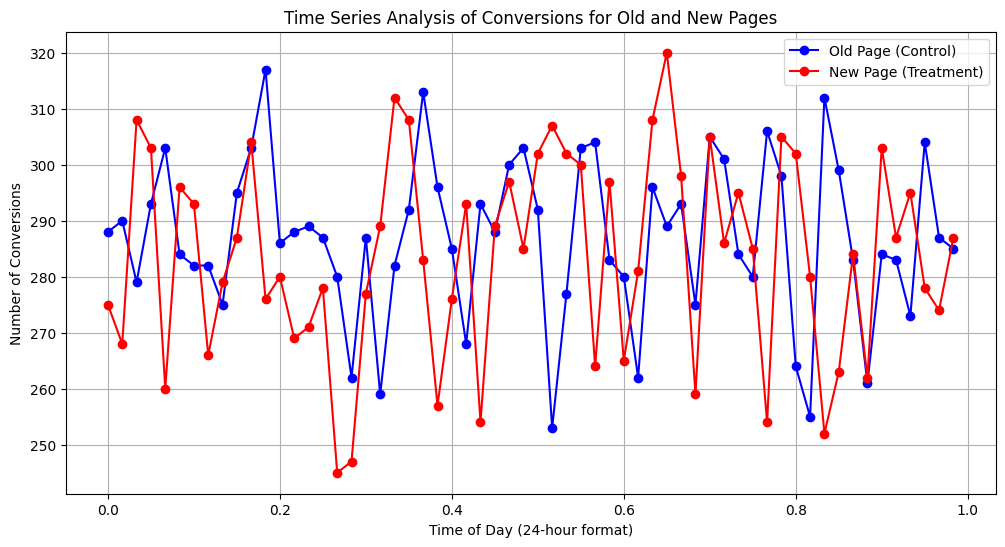

In [31]:
# Convert 'timestamp' to a valid datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%M:%S.%f')

# Extract hour and minute from timestamp
df['hour'] = df['timestamp'].dt.hour
df['minute'] = df['timestamp'].dt.minute

# Separate data for control (old page) and treatment (new page)
control_data = df[df['group'] == 'control']
treatment_data = df[df['group'] == 'treatment']

# Group by hour and minute, and calculate the total number of conversions for each group
control_time_series = control_data.groupby(['hour', 'minute'])['converted'].sum().reset_index()
treatment_time_series = treatment_data.groupby(['hour', 'minute'])['converted'].sum().reset_index()

# Plot the time series for both groups
plt.figure(figsize=(12, 6))

# Plot old page (control) conversions
plt.plot(control_time_series['hour'] + control_time_series['minute'] / 60,
         control_time_series['converted'],
         marker='o', linestyle='-', color='b', label='Old Page (Control)')

# Plot new page (treatment) conversions
plt.plot(treatment_time_series['hour'] + treatment_time_series['minute'] / 60,
         treatment_time_series['converted'],
         marker='o', linestyle='-', color='r', label='New Page (Treatment)')

plt.title('Time Series Analysis of Conversions for Old and New Pages')
plt.xlabel('Time of Day (24-hour format)')
plt.ylabel('Number of Conversions')
plt.legend()
plt.grid(True)
plt.show()

In [35]:
#Note that the dataset only contains of one range of hour. The '00' in the hour component indicates
#that the timestamp falls within the midnight hour (00:00 to 00:59).

# So the X axis shows the minutes from 00:00 to 00:59

###Final Note
The A/B testing analysis showed us that the new page has not done any better in converting customers. But since the dataset is not very rich, we can not take our analysis further to address the problem of the new page.